## History
- 11Nov2022 - Published, authored by Irham (Datains)
- 10Feb2023 - Modified by AndyW (andyw_apcd@hotmail.com) to use geojson data from NKHNT_pub

## Library

In [1]:
#install the required library

!pip install pysal
!pip install contextily
!pip install rioxarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 779.0 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 7.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.9/112.9 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.7/243.7 kB 355.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.6/532.6 kB 1.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.0
    Uninstalling numpy-1.24.0:
      Successfully uninstalled numpy-1.24.0
  DEPRECATION: rvlib is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Running setup.py install for rvlib ... done
  DEPRECATION: inequality is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A 

In [3]:
#import the required library


import matplotlib.pyplot as plt  # Graphics
from matplotlib import colors
import seaborn as sns  # Graphics
import geopandas as gpd  # Spatial data manipulation
import pandas as pd  # Tabular data manipulation
import rioxarray  # Surface data manipulation
import xarray  # Surface data manipulation
import pysal as ps #Spatial analysis
from pysal.explore import esda  # Exploratory Spatial analytics
from pysal.lib import weights  # Spatial weights
import contextily  # Background tiles
from sklearn import cluster #creating cluster
from sklearn.preprocessing import scale #preprocessing for create scale
from splot import esda as esdaplot # Exploratory Spatial analytics


sns.set(style="whitegrid")

/Users/andy.wong/Downloads/UNDBH 2022/venv/lib/python3.8/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/var/folders/sy/sh1j4k1s4453kybyvgb0n85r0000gn/T/ipykernel_5649/2157143157.py:7: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shape

## Read the dataset

In [160]:
#db is dataset contain final calculation and features component for the project 

db = gpd.read_file('Neighbourhoods_keep.geojson')

In [161]:
db.columns

Index(['OBJECTID', 'WADMKK', 'WADMKC', 'WADMKD', 'SHAPE_Area', 'SHAPE_Length',
       'T_transit', 'T_driving', 'T_ridehail', 'CO2e_transit', 'CO2e_driving',
       'route_details', 'H', 'income', 'pct_income_on_T_transit',
       'pct_income_on_T_driving', 'pct_income_on_T_ridehail',
       'pct_income_on_H_cost', 'pct_income_on_HnTr_cost',
       'pct_income_on_HnTd_cost', 'pct_income_on_HnTh_cost', 'from_origin',
       'to_destination', 'geometry'],
      dtype='object')

# Building the model

In [135]:
# Generate W from the GeoDataFrame, W is the weighted value for Lisa Cluster
w = weights.distance.KNN.from_dataframe(db, k=8)
# Row-standardization
w.transform = "R"

Local Moran’s 

In [162]:
#run the model
lisa = esda.moran.Moran_Local(db['pct_income_on_HnTh_cost'], w)

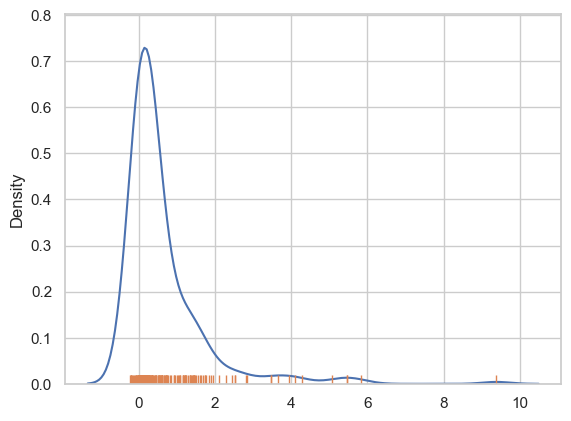

In [163]:
# Draw KDE line
ax = sns.kdeplot(lisa.Is)
# Add one small bar (rug) for each observation
# along horizontal axis
sns.rugplot(lisa.Is, ax=ax);

## Plot the result

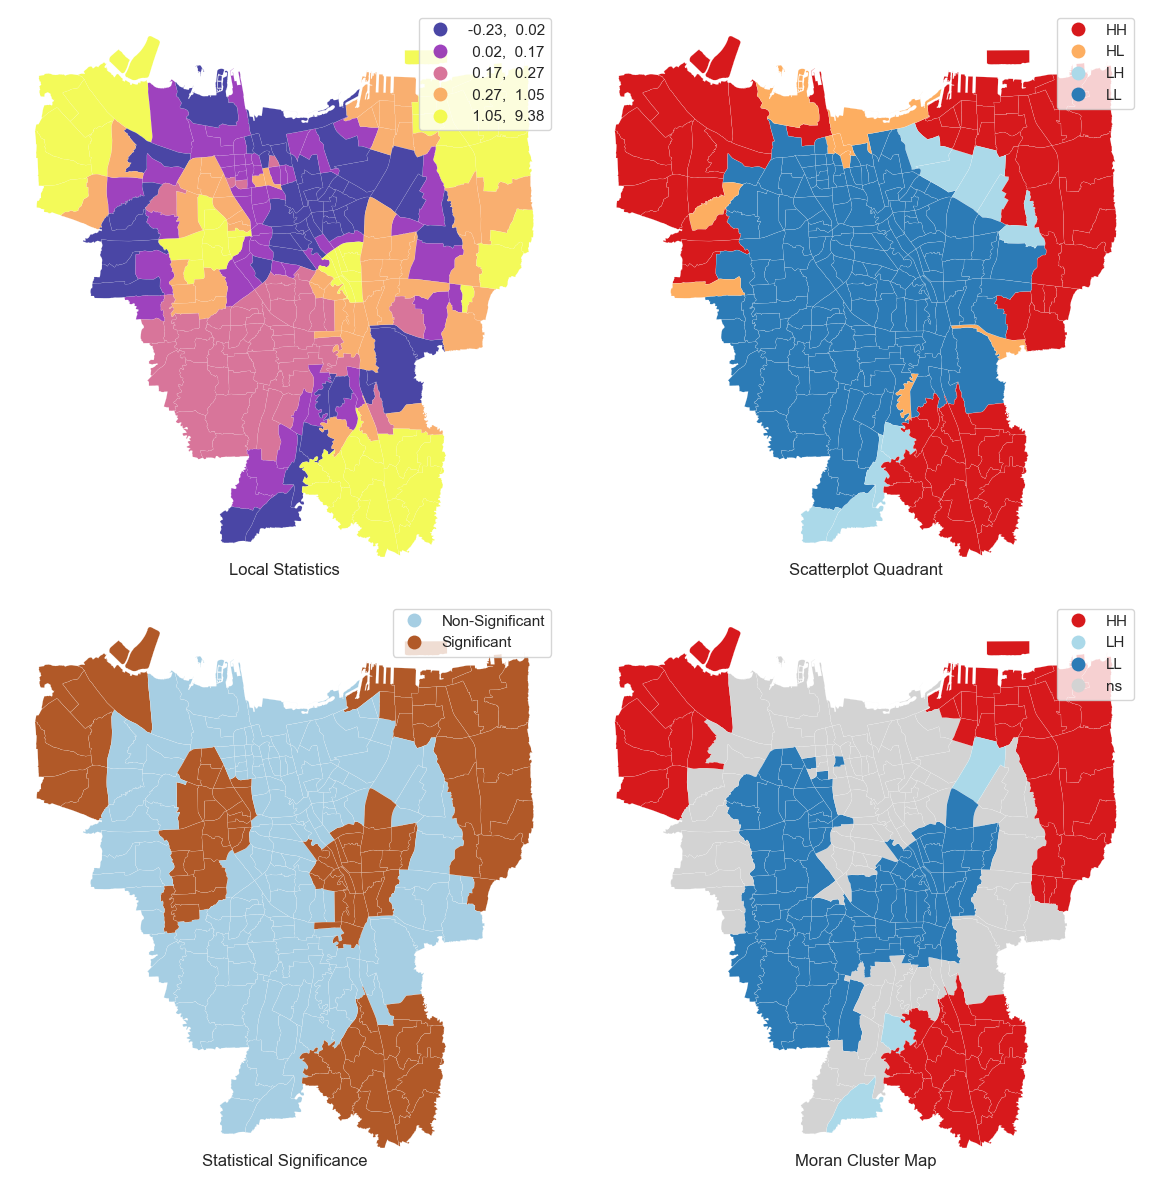

In [164]:
# Set up figure and axes
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()

# Subplot 1 #
# Choropleth of local statistics
# Grab first axis in the figure
ax = axs[0]
# Assign new column with local statistics on-the-fly
db.assign(
    Is=lisa.Is
    # Plot choropleth of local statistics
).plot(
    column="Is",
    cmap="plasma",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.1,
    alpha=0.75,
    legend=True,
    ax=ax,
)

# Subplot 2 #
# Quadrant categories
# Grab second axis of local statistics
ax = axs[1]
# Plot Quandrant colors (note to ensure all polygons are assigned a
# quadrant, we "trick" the function by setting significance level to
# 1 so all observations are treated as "significant" and thus assigned
# a quadrant color
esdaplot.lisa_cluster(lisa, db, p=1, ax=ax)

# Subplot 3 #
# Significance map
# Grab third axis of local statistics
ax = axs[2]
#
# Find out significant observations
labels = pd.Series(
    1 * (lisa.p_sim < 0.05),  # Assign 1 if significant, 0 otherwise
    index=db.index  # Use the index in the original data
    # Recode 1 to "Significant and 0 to "Non-significant"
).map({1: "Significant", 0: "Non-Significant"})
# Assign labels to `db` on the fly
db.assign(
    cl=labels
    # Plot choropleth of (non-)significant areas
).plot(
    column="cl",
    categorical=True,
    k=2,
    cmap="Paired",
    linewidth=0.1,
    edgecolor="white",
    legend=True,
    ax=ax,
)


# Subplot 4 #
# Cluster map
# Grab second axis of local statistics
ax = axs[3]
# Plot Quandrant colors In this case, we use a 5% significance
# level to select polygons as part of statistically significant
# clusters
esdaplot.lisa_cluster(lisa, db, p=0.10, ax=ax)

# Figure styling #
# Set title to each subplot
for i, ax in enumerate(axs.flatten()):
    ax.set_axis_off()
    ax.set_title(
        [
            "Local Statistics",
            "Scatterplot Quadrant",
            "Statistical Significance",
            "Moran Cluster Map",
        ][i],
        y=0,
    )
# Tight layout to minimise in-betwee white space
f.tight_layout()

# Display the figure
plt.show()

In [165]:
counts = pd.value_counts(lisa.q) / len(lisa.q)
counts

3    0.678161
1    0.252874
4    0.034483
2    0.034483
dtype: float64

In [166]:
asd= pd.DataFrame(counts).reset_index()
asd['index']

0    3
1    1
2    4
3    2
Name: index, dtype: int64

In [167]:
(lisa.p_sim < 0.05).sum() * 100 / len(lisa.p_sim)

38.31417624521073

In [168]:
# Assign pseudo P-values to `db`
db["p-sim_quadrant"] = lisa.p_sim
# `1` if significant (at 5% confidence level), `0` otherwise
sig_quadrant = 1 * (lisa.p_sim < 1)
# Assign significance flag to `db`
db["sig_quadrant"] = sig_quadrant
# Print top of the table to inspect

In [169]:
# Assign pseudo P-values to `db`
db["p-sim"] = lisa.p_sim
# `1` if significant (at 5% confidence level), `0` otherwise
sig = 1 * (lisa.p_sim < 0.05)
# Assign significance flag to `db`
db["sig"] = sig
# Print top of the table to inspect

In [170]:
# Pick as part of a quadrant only significant polygons,
# assign `0` otherwise (Non-significant polygons)
spots2 = lisa.q * sig_quadrant
db['spots_quadrant'] = spots2
# Mapping from value to name (as a dict)
spots_labels = {
    0: "Non-Significant",
    1: "HH",
    2: "LH",
    3: "LL",
    4: "HL",
}
# Create column in `db` with labels for each polygon
db["labels_quadrant"] = pd.Series(
    # First initialise a Series using values and `db` index
    spots2,
    index=db.index
    # Then map each value to corresponding label based
    # on the `spots_labels` mapping
).map(spots_labels)
# Print top for inspection

In [171]:
# Pick as part of a quadrant only significant polygons,
# assign `0` otherwise (Non-significant polygons)
spots = lisa.q * sig
db['spots'] = spots
# Mapping from value to name (as a dict)
spots_labels = {
    0: "Non-Significant",
    1: "HH",
    2: "LH",
    3: "LL",
    4: "HL",
}
# Create column in `db` with labels for each polygon
db["labels_morant_cluster"] = pd.Series(
    # First initialise a Series using values and `db` index
    spots,
    index=db.index
    # Then map each value to corresponding label based
    # on the `spots_labels` mapping
).map(spots_labels)
# Print top for inspection


In [172]:
db.head()

OBJECTID         WADMKK         WADMKC               WADMKD  SHAPE_Area  \
0         1  JAKARTA PUSAT  CEMPAKA PUTIH  CEMPAKA PUTIH BARAT    0.000102   
1         2  JAKARTA PUSAT  CEMPAKA PUTIH             RAWASARI    0.000101   
2         3  JAKARTA PUSAT        MENTENG              MENTENG    0.000198   
3         4  JAKARTA PUSAT        MENTENG           PEGANGSAAN    0.000079   
4         5  JAKARTA PUSAT        MENTENG               CIKINI    0.000065   

   SHAPE_Length  T_transit  T_driving  T_ridehail  CO2e_transit  ...  \
0      0.050526     4500.0    7572.73     52000.0         555.0  ...   
1      0.050561     4500.0    7572.73     52000.0         555.0  ...   
2      0.069430     4500.0    7572.73     52000.0         555.0  ...   
3      0.049813     4500.0    7572.73     52000.0         555.0  ...   
4      0.038063     4500.0    7572.73     52000.0         555.0  ...   

   to_destination                                           geometry  \
0      SETIA BUDI  MULTIPOLYGON Z (((106.86789 -6.18105 0.00000, ...   
1      SETIA BUDI  MULTIPOLYGON Z (((106.87438 -6.18729 0.00000, ...   
2      SETIA BUDI  MULTIPOLYGON Z (((106.82074 -6.19411 0.00000, ...   
3      SETIA BUDI  MULTIPOLYGON Z (((106.84443 -6.19580 0.00000, ...   
4      SETIA BUDI  MULTIPOLYGON Z (((106.83626 -6.18675 0.00000, ...   

   p-sim_quadrant  sig_quadrant  p-sim  sig  spots_quadrant  labels_quadrant  \
0           0.461             1  0.461    0               3               LL   
1           0.005             1  0.005    1               3               LL   
2           0.240             1  0.240    0               3               LL   
3           0.005             1  0.005    1               3               LL   
4           0.461             1  0.461    0               3               LL   

   spots  labels_morant_cluster  
0      0        Non-Significant  
1      3                     LL  
2      0        Non-Significant  
3      3                     LL  
4      0        Non-Significant  

[5 rows x 32 columns]

## Save the results

In [173]:
db.to_file('data_sip4.shp')  